# Análise e Coleta dos Dados

O primeiro passo que tomamos para conseguir trabalhar com os dadoes é conseguir dados para o entendimento do projeto e para

## 1. Compreendendo o Limite dos Dados


### 1.1 Funções de Cinemática Inversa

Para conseguir entender primeiramente o robô utilizamos a função Ikine que possui como entrada as cooredenadas $[x, y, z]$  e o comprimento dos eixos do braço robótico $[l_1, l_2, l_3]$, e sua saida é oconjunto de coordenadas $[\theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5 ]$. A função de Ikine funciona da seguinte forma:

**Variáveis Complementares**

$ \phi = \text{atan2}(z, \sqrt{x^2 + y^2}) $

$ x_2 = \sqrt{x^2 + y^2} - l_3 \cdot |\cos(\phi)| $

$ z_2 = z - l_3 \cdot \sin(\phi) $

$ c_3 = \frac{x_2^2 + z_2^2 - l_1^2 - l_2^2}{2 \cdot l_1 \cdot l_2} $

$ c_2 = \frac{(l_1 + l_2 \cdot c_3) \cdot x_2 + l_2 \cdot s_3 \cdot z_2}{x_2^2 + z_2^2} $

$ s_2 = \frac{(l_1 + l_2 \cdot c_3) \cdot z_2 - l_2 \cdot s_3 \cdot x_2}{x_2^2 + z_2^2} $

**Valores dos Ângulos**

$ \theta_0 = \text{atan2}(y, x) $
$ \theta_1 = \text{atan2}(s_2, c_2) $
$ \theta_2 = -\cos^{-1}(c_3) $
$ \theta_3 = \phi - (\theta_1 + \theta_2) $

$$
\theta_{tgt} = [\theta_0, \theta_1, \theta_2, \theta_3, 0, 0]
$$

A saída dessa função é em radianos, por isso, utilizamos uma função de mapeamento transformar os valores em radianos, como também aplicar uma correção dos valores. A fórmula do mapping pode ser dada da seguinte forma:

$$
\theta_{\text{out}} = \left( \left[ 1, 1, -1, 1, 1, 1 \right] \cdot \left( \theta_{\text{tgt}} - \text{rad}\left([0, 90, 0, 0, 0, 0]\right) \right) \right) + \left[ 80, 80, 50, 50, 0, 0 \right]
$$


### 1.2 - Cálculo do no Limite a partir da Função

Neste passo, nós iremos calcular os limites que podemos testar o nosso braço a apartir da função ikine e das limitações físicas do robô. As limitações físicas são o comprimento dos seus links, dados na especificação como: $l_1 = 10cm$, $l_2 = 12.4cm$, $l_3 = 6cm$, dessa forma o braço consegue variar em teoria nesse intervalo de elíptico em $x, y, x$ variando entre $[-27.4cm, 27.4cm]$. Além disso casa ângulo pode variar num intervalo de $[0, ..., 180]$ graus, o que transformará nosso range espacial em elíptico.
Para ese experimento decidimos coletar as informações a cada centímetro, para conseguir coletar uma alta quantidade de dados. Dessa forma definimos $\text{step} = 10mm$ e como intervalo o alcance máximo do braço robótico. Além disso estabelecemos um espaço mínimo entre o centro do braço , ara evitar cenários inalcançáveis como o $[0,0,0]$.  Dessa forma obtivemos como resultado um total de 182229 variações de posições diferentes.

In [1]:
from utils import plots, train_data

l1, l2, l3 = 0.1, 0.124, 0.06 
rg = l1 + l2 + l3
x_range = (-rg, rg) 
y_range = (-rg, rg)
z_range = (-rg, rg)
step = 10

positions = train_data.generate_positions(x_range, y_range, z_range)

total_positions = len(positions)
print(f"Um Total de {total_positions} foram encontradas para o teste")

df = train_data.calculate_joint_angles(positions, l1, l2, l3, "dataframe")

Um Total de 182229 foram encontradas para o teste


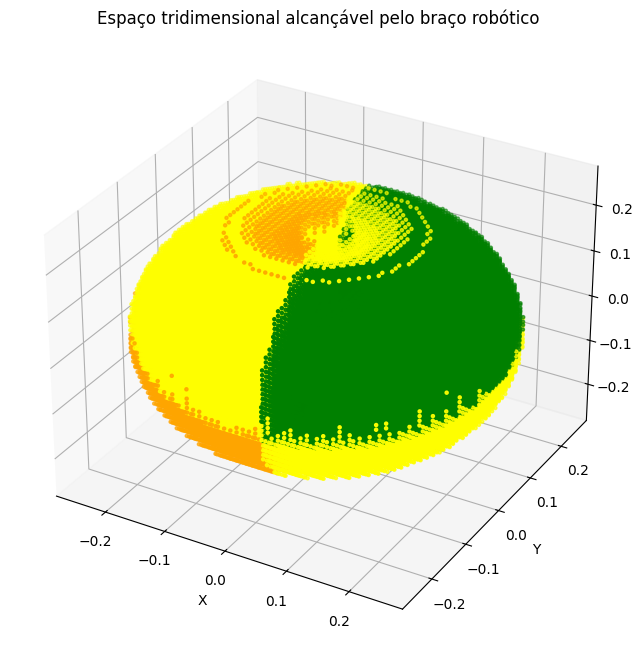

In [2]:
plots.reachable3d(df, rg, 3)

In [3]:

plots.reachable3d_plotly(df,rg, max_errors=0)


Depois disso definimos uma certa altura que fosse interessante para definirmos como padrão, pois uma altura muito alta poderia limitar o alcançe nos eixos $[x, y]$ e uma muito baixa, iria para fora do intervalo alcançavel para a câmera capturar, desta forma definimos , por padrão o valor de $z = 0.12m$. Por fim, este é o espaço alcançavel em que podemos testar com essa valor no eixo z, de forma que em verde possuímos os valores alcançavéis metemáticamente.

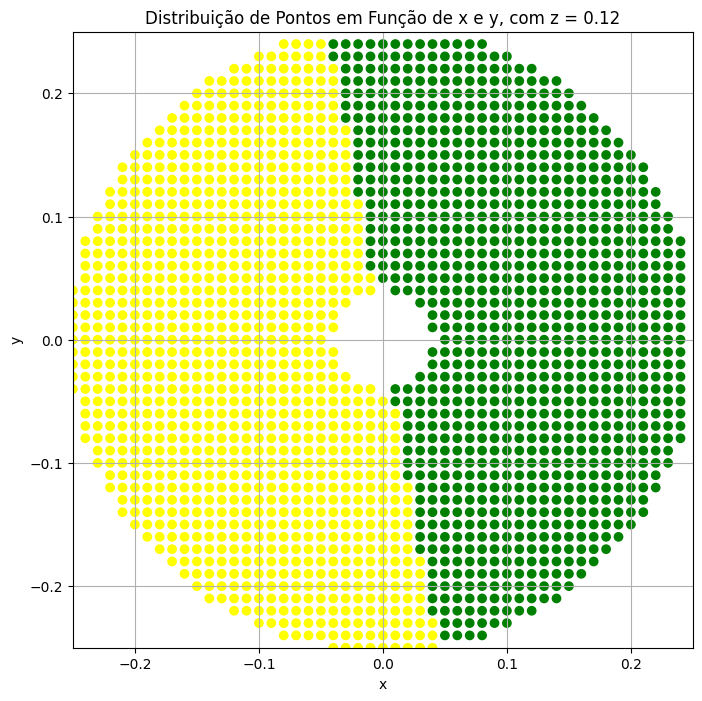

In [4]:
x_range = (-0.25, 0.25)
y_range = (-0.25, 0.25)
positions = train_data.generate_positions(x_range, y_range, (0.12, 0.121), 10)
df = train_data.calculate_joint_angles(positions, l1, l2, l3, "dataframe")
plots.reachable2d(df, 0.12)

O testarmos o braço, notomos que na prática ele embora possua um alcance teórico em alguns pontos, na prática, o braço não responde os movimentos, dessa forma, decidimos limitar o nosso espaço de testes, reduzindo as combinações de x e y, para apenas os valores em que os valors de $x$ fossem $ 0.04 \leq x \ll $, e os valores de $y$ no intervalo completo de $[-0.25, 0.25]$ resultando em **774 amostras** a serem testadas.

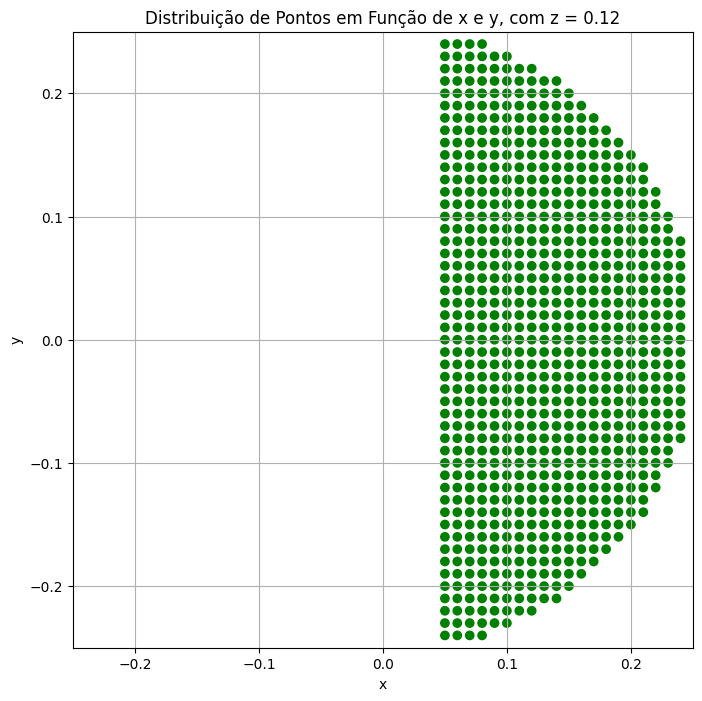

In [5]:
x_range = (0.05, 0.25)
y_range = (-0.25, 0.25)
positions = train_data.generate_positions(x_range, y_range, (0.12, 0.121), 10)
df_tested = train_data.calculate_joint_angles(positions, l1, l2, l3, "dataframe")
plots.reachable2d(df_tested, 0.12)

In [6]:
df_tested

,x,y,z,t0,t1,t2,t3,out_of_range
0,0.05,-0.24,0.12,1.768289,37.711826,81.025619,43.313793,0
1,0.05,-0.23,0.12,2.264774,46.589884,94.436318,47.846434,0
2,0.05,-0.22,0.12,2.804266,53.819983,104.613143,50.793160,0
3,0.05,-0.21,0.12,3.392498,60.276667,113.120225,52.843558,0
4,0.05,-0.20,0.12,4.036243,66.295650,120.543478,54.247828,0
...,...,...,...,...,...,...,...,...
769,0.24,0.04,0.12,89.462322,39.599413,83.960126,44.360713,0
770,0.24,0.05,0.12,91.768289,37.711826,81.025619,43.313793,0
771,0.24,0.06,0.12,94.036243,35.196067,77.045020,41.848953,0
772,0.24,0.07,0.12,96.260205,31.753588,71.469230,39.715641,0


## 2. Coleta de Dados

Para realizar a coleta de dados, criamos a função `get_data_train_inike` que possui como parâmetros:

- `robot` da classe Robot que criamos para comunicarmos com o braço robótico
- `camera` da classe Camera que criamos para comunicarmos com a câmera e identificar os ArUcos na imagem.
- `x_range` tupla que contém o intervalo o qual será variado o eixo x em metros. Para a coleta utilizamos os valores $(0.05, 0.25)$.
- `y_range` tupla que contém o intervalo o qual será variado o eixo y em metros. Para a coleta utilizamos os valores $(-0.25, 0.25)$.
- `z_range` tupla que contém o intervalo o qual será variado o eixo y em metros. Para a coleta utilizamos apenas o valor  $0.12$.
- `step` valor em milímetros da variação que os intervalos são feitos. Utilizamos $10mm$ como o valor para a coleta.
- `l1`, `l2`, `l3` comprimento de cada um dos links do braço robótico.
- `max_samples` valor máximo de unidades retornadas, utilizamos apenas durante o debug da função e não utilizamos esse parâmetro na coleta.

A função funciona a partir dos seguintes passos:

```py
# 1. Geração das posições de teste
tested_positions = generate_positions(x_range, y_range, z_range, step)

# 2. Cálculo das posições das juntas
ikine_positions = calculate_joint_angles(tested_positions, l1, l2, l3, "list")

# 3. Inicia o teste
for i, val in enumerate(ikine_positions):
    x, y, z, t0, t1, t2, t3 = val
    
        # 4. Move o robô para a posição
        robot.move_to(t0, t1, t2, t3)
        
        # 5. Espera um tempo dinâmico para aguardar o movimento do braço 
        dynamic_sleep(last_position, (t0, t1, t2, t3))
        clear_output(wait=True)
        
        # 6. Coleta os dados da câmera
        camera.get_aruco0_positions()
        
        # 7. Atualiza os dados com as novas informações
        x0, y0, x1, y1, x2, y2, x3, y3, xc, yc, diagonal, b64, width, height = camera.get_aruco0_positions(plot_image=True)
        data[data_key] = [x, y, z, t0, t1, t2, t3, x0, y0, x1, y1, x2, y2, x3, y3, xc, yc, diagonal, b64, width, height]

# 8. Retorna  os resultados
return pd.DataFrame(data.values(), columns=[...])

```

Por fim é retornado um array contendo os seguintes valores:

- $x, y, z$: coordenadas do ponto de teste em metros.
- $\theta_n  \mid n \in \mathbb{Z} , 0 \leq n \leq 3$ valores de cada um dos ângulos que o braço robótico eseteve para essa posição.
- $(x_n, y_n) \mid n \in \mathbb{Z}, 0 \leq n \leq 3$ coordenadas em pixels de cada eixo lateral do ArUco identificado.
- $x_c, y_c$ coordenadas em pixels do centro do ArUco, calculado a partir do seu lado.
- $diagonal$ comprimento em pixel da diagonal do ArUco, calculado a partir do seu lado.
- $width, height$ altura e largura ca câmera em questão.

Esta imagem foi coletada antes de ser iniciado o teste, na qual colocamos o robô na sua posição inicial

![Início do Teste](./images/start_position.png)

## 3. Análise de Dados

Após a coleta de dados, podemos analisar os resultados utilizando diversos métodos. Por exemplo, podemos verificar se os ângulos calculados estão próximos dos valores reais do braço robótico.

Para facilitar a visualização dos resultados, podemos plotar o espaço alcançável do braço robótico no plano $xy$ e os ArUcos identificados na imagem.


In [7]:
import pandas as pd

colected_df  = pd.read_csv('./data/data.csv')
colected_df = colected_df.drop(columns=['b64_image'])
colected_df.head()

,x,y,z,t0,t1,t2,t3,x0,y0,x1,y1,x2,y2,x3,y3,xc,yc,diagonal,width,height
0,0.05,-0.24,0.12,1.768289,37.711826,81.025619,43.313793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640,480
1,0.06,-0.24,0.12,4.036243,35.196067,77.045020,41.848953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640,480
2,0.07,-0.24,0.12,6.260205,31.753588,71.469230,39.715641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640,480
3,0.10,-0.23,0.12,13.498566,30.528690,69.449178,38.920487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640,480
4,0.12,-0.22,0.12,18.610460,30.845048,69.972724,39.127676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640,480


In [8]:
colected_df.describe()

,x,y,z,t0,t1,t2,t3,x0,y0,x1,y1,x2,y2,x3,y3,xc,yc,diagonal,width,height
count,774.000000,7.740000e+02,7.740000e+02,774.000000,774.000000,774.000000,774.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,774.0,774.0
mean,0.131240,5.737587e-19,1.200000e-01,80.000000,80.835885,129.686182,48.850297,304.419714,219.581876,309.084261,189.966614,354.767886,197.179650,350.572337,227.297297,329.344992,208.138315,71.335927,640.0,480.0
std,0.054172,1.211032e-01,4.166028e-17,42.820654,31.333147,29.236501,7.730265,129.816917,78.155967,150.690029,83.606204,145.402418,93.330782,123.799830,87.112229,137.401488,83.727844,3.495603,0.0,0.0
min,0.050000,-2.400000e-01,1.200000e-01,1.768289,26.308417,62.342498,15.428211,38.000000,55.000000,4.000000,13.000000,8.000000,5.000000,44.000000,47.000000,23.000000,30.000000,47.423623,640.0,480.0
25%,0.080000,-1.000000e-01,1.200000e-01,43.648277,56.254252,107.885695,45.600268,212.000000,160.000000,195.000000,127.000000,243.000000,120.000000,261.000000,156.000000,228.000000,142.000000,70.263789,640.0,480.0
50%,0.130000,0.000000e+00,1.200000e-01,80.000000,77.033249,132.539642,51.631443,292.000000,224.000000,303.000000,195.000000,361.000000,201.000000,350.000000,228.000000,326.000000,213.000000,71.610055,640.0,480.0
75%,0.170000,1.000000e-01,1.200000e-01,116.351723,103.223335,155.023961,54.637302,402.000000,286.000000,425.000000,260.000000,468.000000,268.000000,442.000000,296.000000,435.000000,276.000000,72.945185,640.0,480.0
max,0.240000,2.400000e-01,1.200000e-01,158.231711,156.963240,172.616067,55.568382,588.000000,382.000000,630.000000,380.000000,635.000000,397.000000,595.000000,399.000000,611.000000,366.000000,95.294281,640.0,480.0


Ao total dos 774 tivemos 145 valores ausentes, o que dá cerca de 19% dos dados forma perdidos, em nossa observação, notamos que houve um problema na captura principalmente entre os pontos mais extremos no eixo y e em alguns pontos mais centrais.

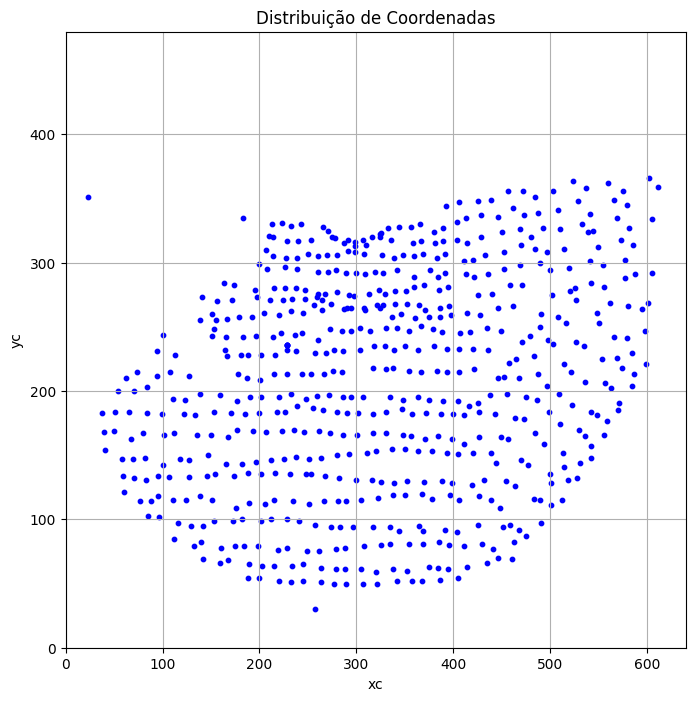

In [9]:
plots.coords_distrib(colected_df)

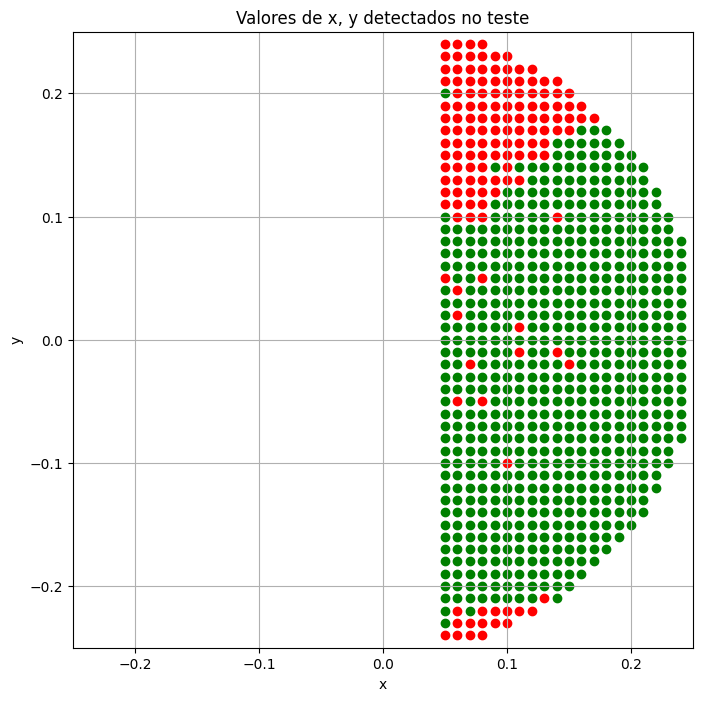

In [10]:
plots.result_df_diff(df_tested, colected_df)

Um dado curioso, foi a distribuição do valor da diagonal, que em tese deveria ter uma baixa variação, variando por um erro na câmera na hora da captura, uma vez que o valor de z era constante. Dessa forma para entendermos melhor criamos uma visualização para entender melhor onde está havendo essa diferenciação, e nota-se que esse valores distintos se concentram bastante quanto mais ao centro de x, y.

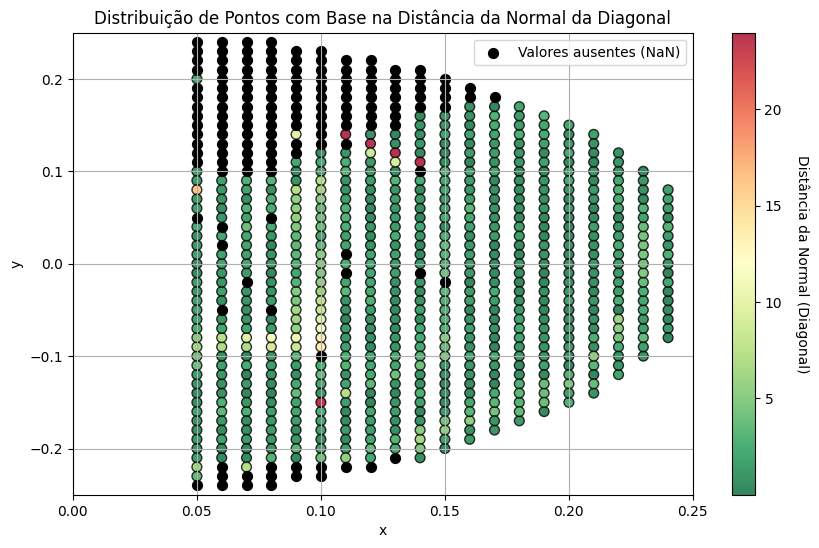

In [11]:
plots.diff_diagonal_normal(colected_df)

Agora vamos verificar as distribuiçoes e correlações de cada um dos eixos, ou seja, o x do valor real e o valor yc para a posição central do aruco na imagem.

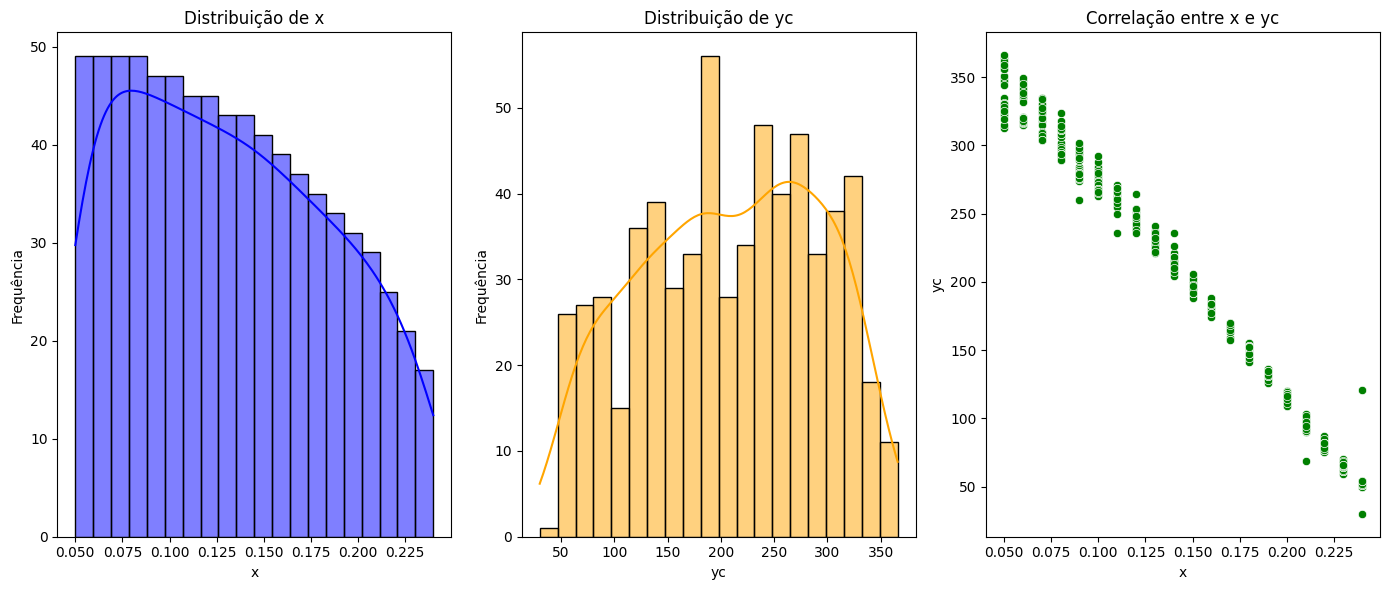

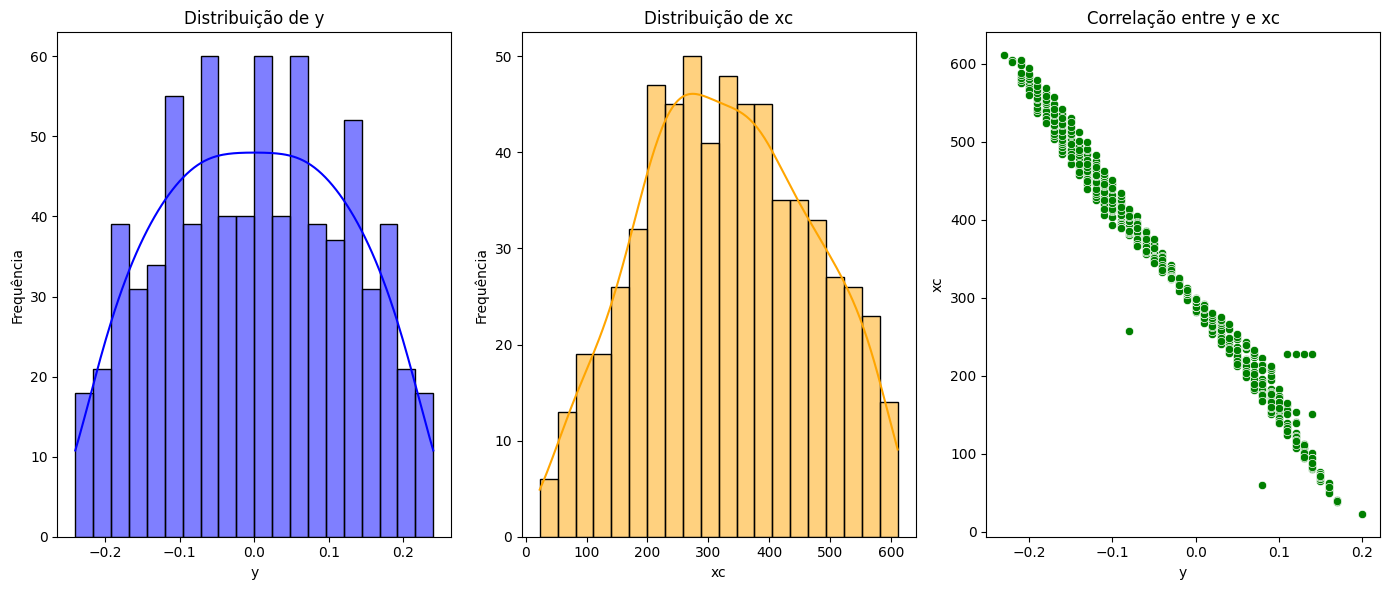

In [12]:
plots.distribution_and_correlation(colected_df, 'x', 'yc')
plots.distribution_and_correlation(colected_df, 'y', 'xc')


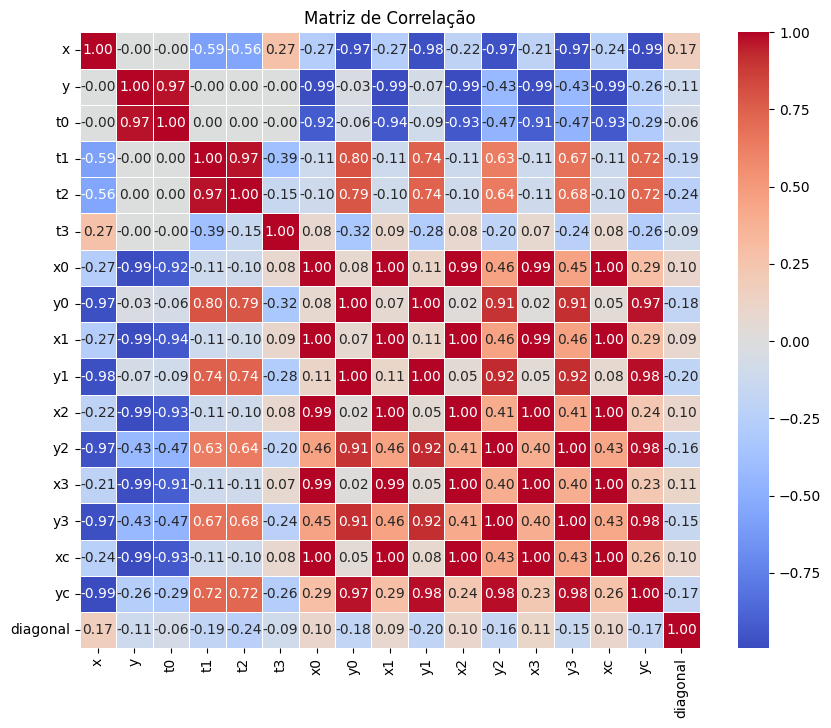

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(colected_df.drop(columns=["z", "width", "height"]).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

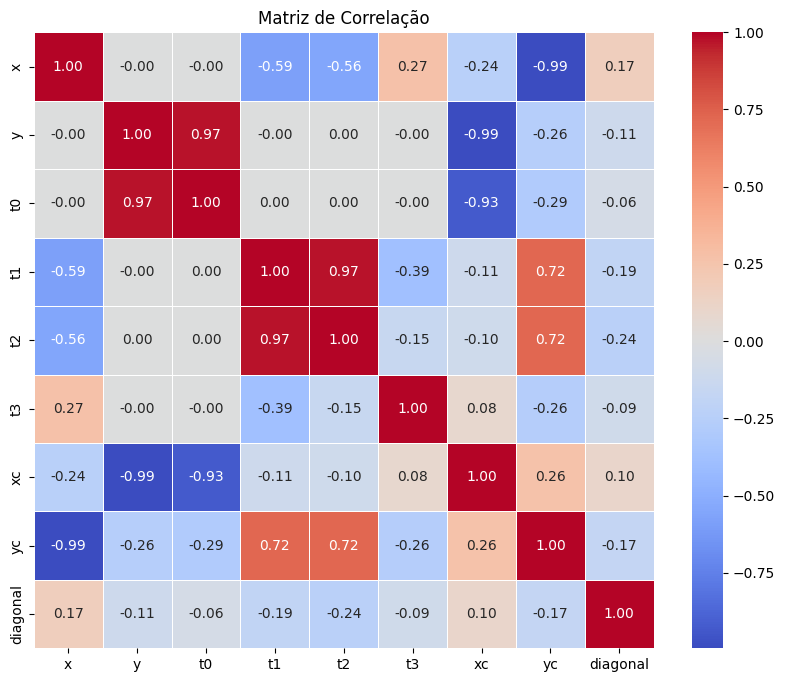

In [15]:
ignore_columns = ["z", "width", "height", "x0", "y0", "x1", "y1", "x2", "y2", "x3", "y3"]
plt.figure(figsize=(10, 8))
sns.heatmap(colected_df.drop(columns=ignore_columns).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()